In [1]:
from pygmt.datasets import load_earth_vertical_gravity_gradient
from pygmt.datasets import load_earth_magnetic_anomaly
from pygmt.datasets import load_earth_free_air_anomaly
from pygmt.datasets import load_earth_relief
import pygmt

In [15]:
grid = load_earth_vertical_gravity_gradient(
    resolution="02m",
    region=[-79, -66, -5, 15],
    registration="gridline",
)

grid.to_netcdf("colombia_gravity_map.nc")

grdblend [NOTICE]: Remote data courtesy of GMT data server oceania [http://oceania.generic-mapping-tools.org]
grdblend [NOTICE]: IGPP Earth Vertical Gravity Gradient Anomalies v32 at 02x02 arc minutes reduced by Gaussian Cartesian filtering (3.8 km fullwidth) [Sandwell et al., 2019].
grdblend [NOTICE]:   -> Download 60x60 degree grid tile (earth_vgg_02m_g): S30W120


In [19]:
grid = load_earth_magnetic_anomaly(
    resolution="05m",
    region=[-79, -66, -5, 15],
    registration="gridline",
    data_source="wdmam")

grid.to_netcdf("colombia_magnetic.nc")

grdblend [NOTICE]: Remote data courtesy of GMT data server oceania [http://oceania.generic-mapping-tools.org]
grdblend [NOTICE]: WDMAM Earth Magnetic Anomalies v2.1 at 05x05 arc minutes reduced by Gaussian Cartesian filtering (9.3 km fullwidth) [Choi et al. 2023].
grdblend [NOTICE]:   -> Download 180x180 degree grid tile (earth_wdmam_05m_g): S90W180


In [5]:
grid = load_earth_free_air_anomaly(
    resolution="01m",
    region=[-79, -66, -5, 15],
    registration="pixel",
)

grid.to_netcdf("colombia_FAA.nc")

## Bouguer

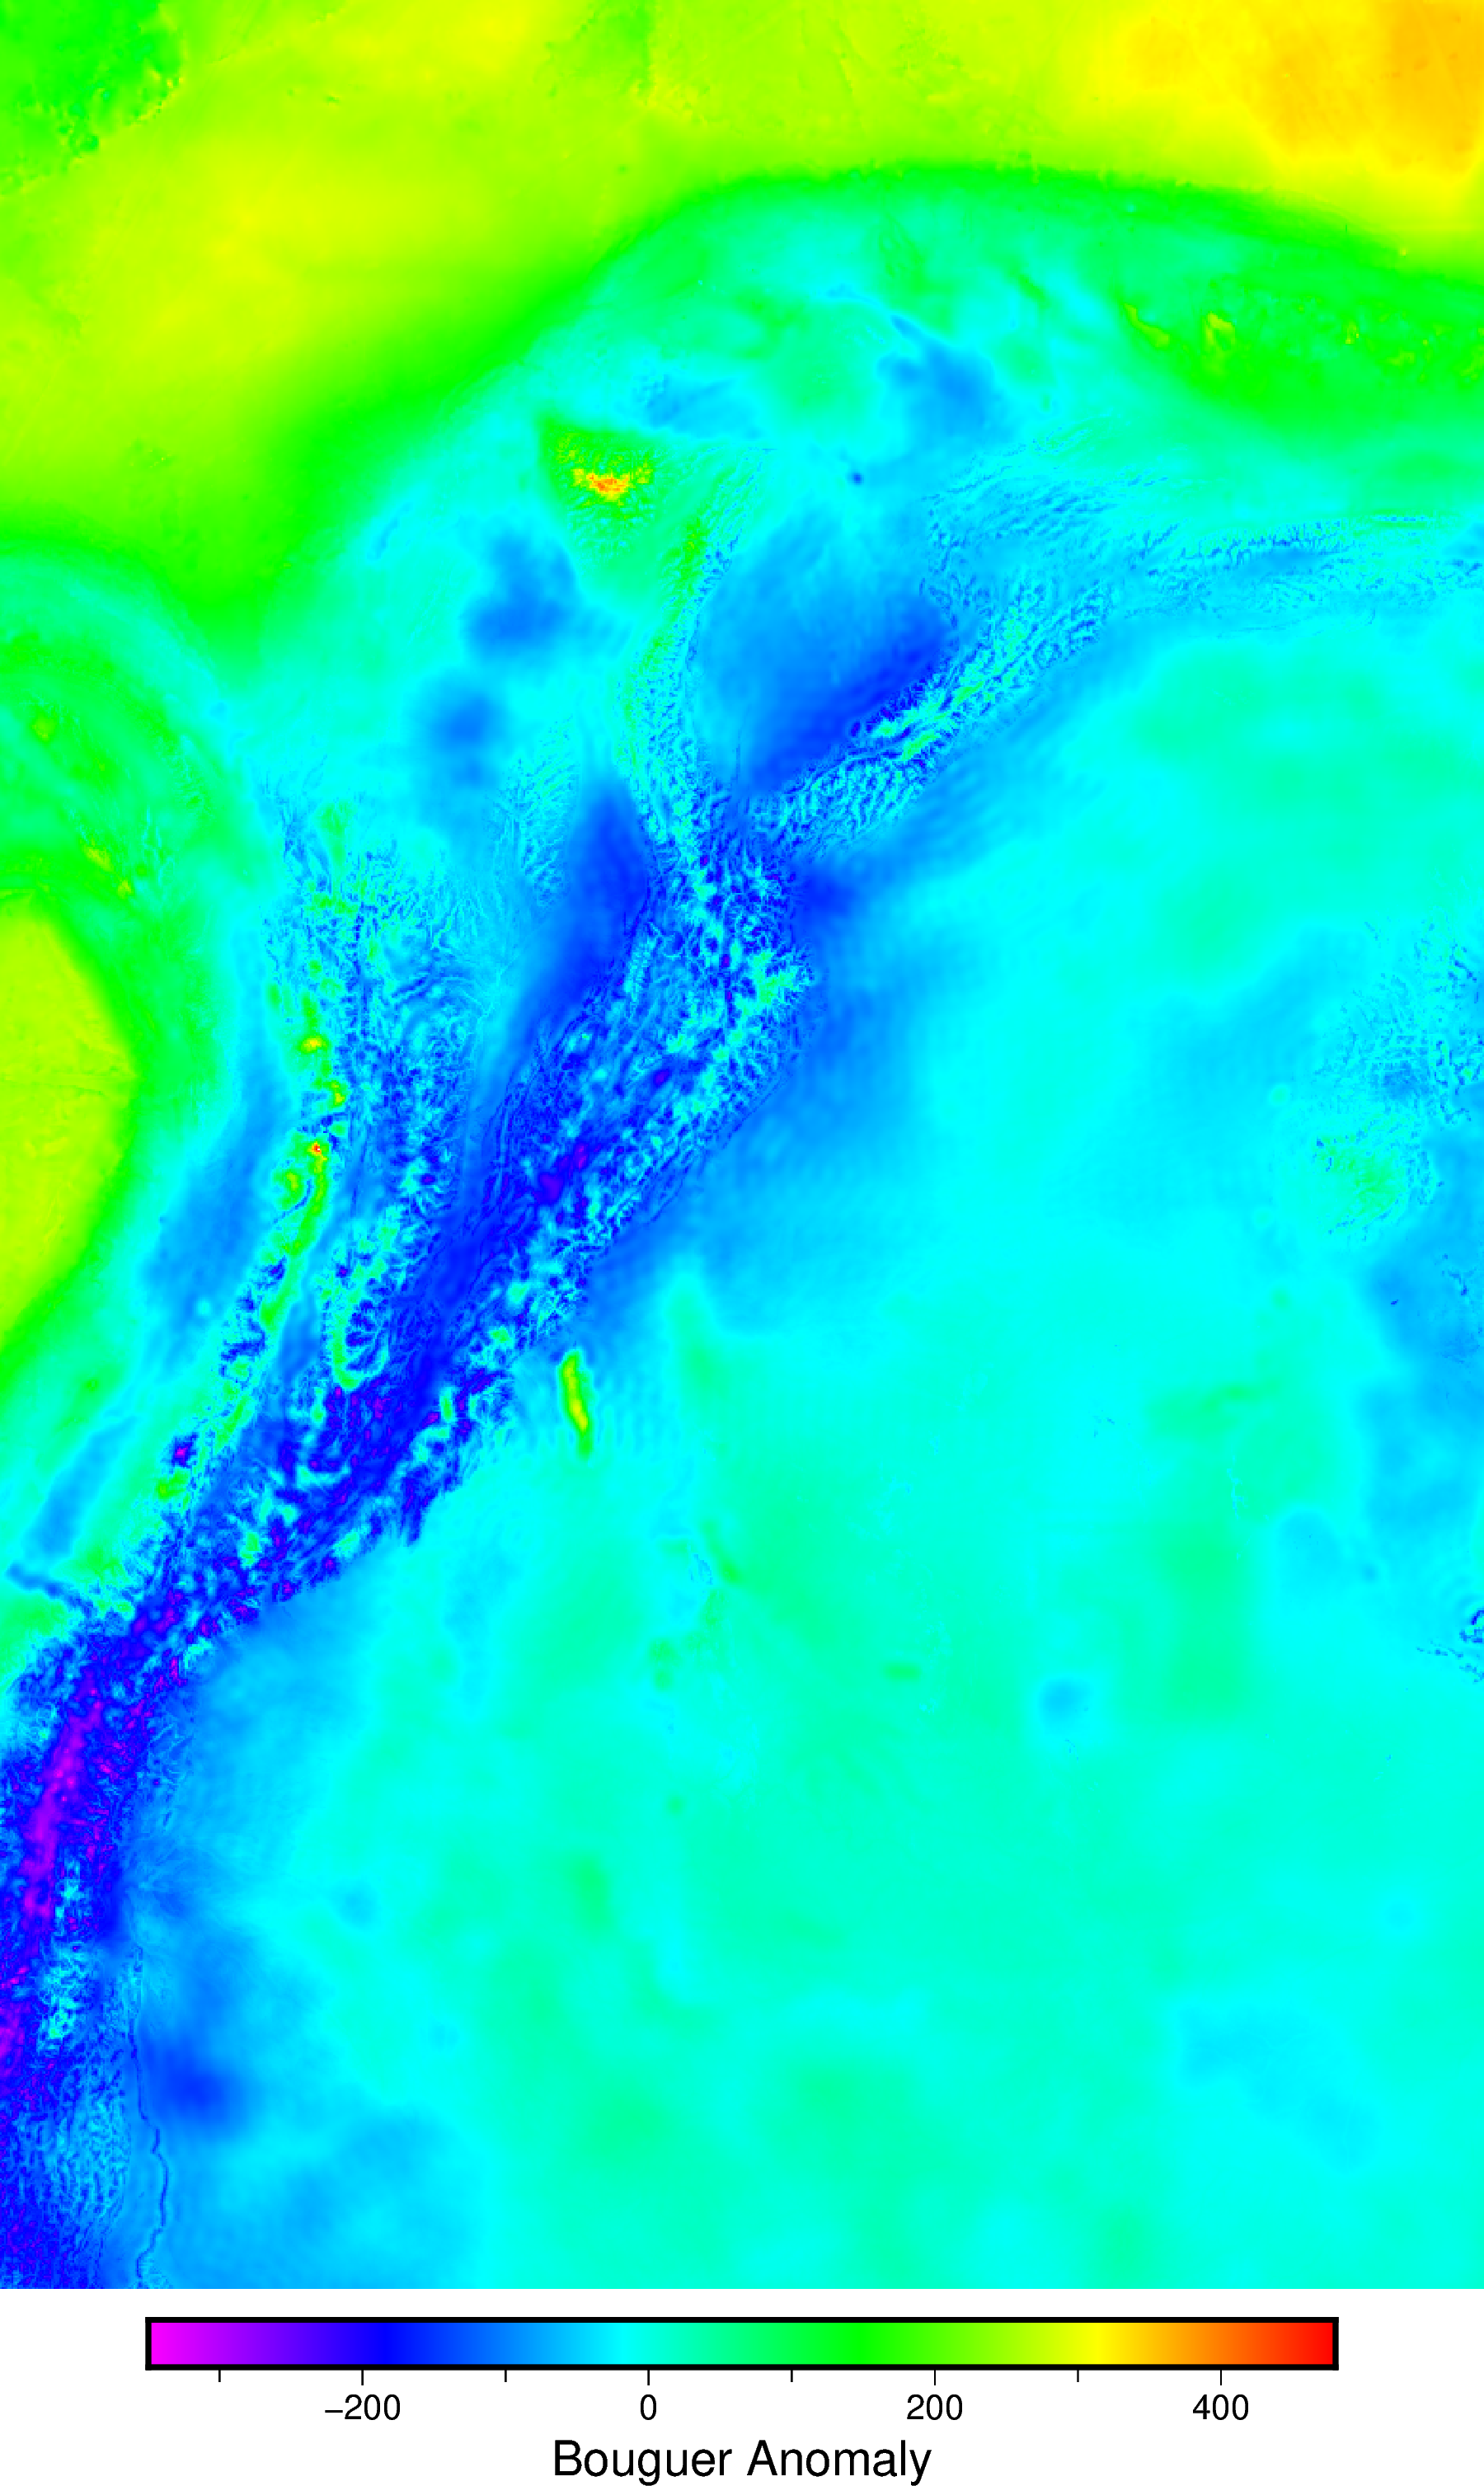

In [6]:
import pygmt
import xarray as xr
import harmonica as hm
import numpy as np

# Load the Free Air Anomaly data
free_air = pygmt.datasets.load_earth_free_air_anomaly(
    resolution="01m",
    region=[-79, -66, -5, 15],
    registration="pixel"
)

# Load the Earth relief (elevation) data
elevation = pygmt.datasets.load_earth_relief(
    resolution="01m",
    region=[-79, -66, -5, 15],
    registration="pixel",
    use_srtm=True
)

# Handle NaN values if necessary
free_air = free_air.fillna(0)
elevation = elevation.fillna(0)

# Calculate the Bouguer correction (in mGal)
bouguer_correction = hm.bouguer_correction(elevation)

# Calculate the Bouguer anomaly (in mGal)
bouguer_anomaly = free_air - bouguer_correction

# Ensure that the Bouguer anomaly array is not empty and does not contain only NaN values
if bouguer_anomaly.size == 0 or np.all(np.isnan(bouguer_anomaly)):
    raise ValueError("Bouguer anomaly calculation resulted in an empty or invalid array.")

# Plotting the Bouguer anomaly
fig = pygmt.Figure()

# Explicitly convert min and max values to float
min_anomaly = float(bouguer_anomaly.min())
max_anomaly = float(bouguer_anomaly.max())

pygmt.makecpt(cmap="rainbow", series=[min_anomaly, max_anomaly])
fig.grdimage(grid=bouguer_anomaly, cmap=True, projection="M6i")
fig.colorbar(frame='af+l"Bouguer Anomaly"')
fig.show()

In [14]:
bouguer_anomaly.to_netcdf("colombia_Bouguer_2.nc")

In [8]:
pygmt.grdinfo(bouguer_anomaly)

': Title: \n: Command: \n: Remark: \n: Gridline node registration used [Cartesian grid]\n: Grid file format: nf = GMT netCDF format (32-bit float), CF-1.7\n: x_min: -78.9916666667 x_max: -66.0083333333 x_inc: 0.0166666666667 name: x n_columns: 780\n: y_min: -4.99166666667 y_max: 14.9916666667 y_inc: 0.0166666666667 name: y n_rows: 1200\n: v_min: -349.764312744 v_max: 480.172271729 name: z\n: scale_factor: 1 add_offset: 0\n: format: classic\n: Default CPT: \n'